In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, norm, normaltest
import math
import scipy.stats as stats

from pathlib import Path

#from scipy.spatial.distance import yule

In [2]:
# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())

DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"

DIR_BASE = DIRETORIO_PRINCIPAL / "analise_abordagens"

### Funções de medidas de associações: Q de Yule, V Cramer e Kruskal Gamma

In [3]:
#def comb(n,k):
#    return int(math.factorial(n) / (math.factorial(k)*math.factorial(n - k)))
#
#def yule(m):
#    m = np.array(m)
#    a = ((m[0][0]*m[1][1]) - (m[0][1]*m[1][0]))
#    b = ((m[0][0]*m[1][1]) + (m[0][1]*m[1][0]))
#    if b == 0:
#        #y = 0.0
#        return np.nan, 'Não há dados para o cálculo da diferença estatística'
#    else:
#        y = np.round(a / b, 4)
#    
#    if y < 0:
#        qual = 'Associação Inversa'
#    else:
#        qual = 'Associação Direta'
#
#    if abs(y) <= 0.2:
#         qual += ' - Diferença Estatística Ausente'
#    elif abs(y) > 0.2 and y <= 0.5:
#         qual += ' - Diferença Estatística Pequena'
#    elif abs(y) > 0.5 and y <= 0.8:
#         qual += ' - Diferença Estatística Moderada'
#    elif abs(y) > 0.8:
#        qual += ' - Diferença Estatística Grande'
#    
#    return y, qual
#
##Referência: ausente: [0-0,2]; pequena: (0,2-0,5]; moderada: (0,5-0,8]; grande: > 0,8.","\n",
#def cramer_v(m):
#    if min(m.shape) < 2:
#        print('\n\nDados com dimensão menor que 2!\n\n')
#        return 0
#    
#    try:
#        chi2, p, dof, ex = chi2_contingency(m)
#    except:
#        #chi2 = 0
#        return np.nan, 'Não há dados para o cálculo da diferença estatística'
#        
#    v = (chi2/(m.sum().sum() * (min(m.shape) - 1))) ** (0.5)
#    
#    if v <= 0.2:
#        return v, 'Diferença Estatística Ausente'
#    elif v <= 0.5:
#        return v, 'Diferença Estatística Pequena'
#    elif v <= 0.8:
#        return v, 'Diferença Estatística Moderada'
#    elif v > 0.8:
#        return v, 'Diferença Estatística Grande'
#    
#def kruskal_g(data):#, ordinal1, ordinal2, orderLabels1, orderLabels2=None):
## myCrosstable = pd.crosstab(data[ordinal1], data[ordinal2])
## 
## myCrosstable = myCrosstable.reindex(orderLabels1)
##         
## if orderLabels2 == None:
##     myCrosstable = myCrosstable[orderLabels1]
## else:
##     myCrosstable = myCrosstable[orderLabels2]
#    myCrosstable = data
#    nRows = myCrosstable.shape[0]
#    nCols = myCrosstable.shape[1]
#    
#    
#    C = [[0 for x in range(nCols)] for y in range(nRows)] 
#
#    # top left part
#    for i in range(nRows):
#        for j in range(nCols):
#            h = i-1
#            k = j-1        
#            if h>=0 and k>=0:            
#                for p in range(h+1):
#                    for q in range(k+1):
#                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]
#
#    # bottom right part                    
#    for i in range(nRows):
#        for j in range(nCols):
#            h = i+1
#            k = j+1        
#            if h<nRows and k<nCols:            
#                for p in range(h, nRows):
#                    for q in range(k, nCols):
#                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]
#                        
#    D = [[0 for x in range(nCols)] for y in range(nRows)] 
#
#    # bottom left part
#    for i in range(nRows):
#        for j in range(nCols):
#            h = i+1
#            k = j-1        
#            if h<nRows and k>=0:            
#                for p in range(h, nRows):
#                    for q in range(k+1):
#                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]
#
#    # top right part                    
#    for i in range(nRows):
#        for j in range(nCols):
#            h = i-1
#            k = j+1        
#            if h>=0 and k<nCols:            
#                for p in range(h+1):
#                    for q in range(k, nCols):
#                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]
#    P = 0
#    Q = 0
#    for i in range(nRows):
#        for j in range(nCols):
#            P = P + C[i][j] * list(myCrosstable.iloc[i])[j]
#            Q = Q + D[i][j] * list(myCrosstable.iloc[i])[j]
#               
#    try:
#        GKgamma = (P - Q) / (P + Q)
#    except:
#        return (np.nan, 'Não há dados para o cálculo da diferença estatística'), 0
##    if abs(GKgamma) < .10:
##        qual = 'Negligible'
##    elif abs(GKgamma) < .20:
##        qual = 'Weak'
##    elif abs(GKgamma) < .40:
##        qual = 'Moderate'
##    elif abs(GKgamma) < .60:
##        qual = 'Relatively strong'
##    elif abs(GKgamma) < .80:
##        qual = 'Strong'        
##    else:
##        qual = 'Very strong'
#
#    if GKgamma < 0:
#        qual = 'Associação Inversa'
#    else:
#        qual = 'Associação Direta'
#        
#    if abs(GKgamma) <= .20:
#        qual += ' - Diferença Estatística Ausente'
#    elif abs(GKgamma) <= .50:
#        qual += ' - Diferença Estatística Pequena'
#    elif abs(GKgamma) <= .80:
#        qual += ' - Diferença Estatística Moderada'
#    elif abs(GKgamma) > .80:
#        qual += ' - Diferença Estatística Grande'        
#
#    n = myCrosstable.sum().sum()
#    
##    try:
##        Z1 = GKgamma * ((P + Q) / (n * (1 - GKgamma**2)))**0.5
##        forASE0 = 0
##        forASE1 = 0
##        for i in range(nRows):
##            for j in range(nCols):
##                forASE0 = forASE0 + list(myCrosstable.iloc[i])[j] * (Q * C[i][j] - P * D[i][j])**2
##                forASE1 = forASE1 + list(myCrosstable.iloc[i])[j] * (C[i][j] - D[i][j])**2 
##        ASE0 = 4 * (forASE0)**0.5 / (P + Q)**2
##        ASE1 = 2 * (forASE1 - (P - Q)**2 / n)**0.5 / (P + Q)        
##        Z2 = GKgamma / ASE0
##        Z3 = GKgamma / ASE1
##        
##        p1 = norm.sf(Z1)
##        p2 = norm.sf(Z2)
##        p3 = norm.sf(Z3)
##        
##        zvalues = [Z1] + [Z2] + [Z3]
##        pvalues = [p1] + [p2] + [p3]
##    except:
##        pvalues = [0.0,0.0,0.0]
#    return (GKgamma,qual), 0 #zvalues, pvalues

## Aplica as funções para cálculo das medidas de associação

In [4]:
#def aplica_cramer(df, df_saida):
#    n_linhas = comb(df.shape[1],2) + 1
#    n_colunas = df.shape[1]
#    
#    lista_cramer_quant = list()
#    lista_cramer_quali = list()
#    
#    resultado = cramer_v(df)
#    
#    lista_cramer_quant.append (np.round(resultado[0],4))
#    lista_cramer_quali.append (resultado[1])
#    
#    for i in range(n_linhas - 1):
#        lista_cramer_quant.append(np.nan)
#        lista_cramer_quali.append(np.nan)
#    
#    df_saida['V de Cramer (Quant)'] = lista_cramer_quant
#    df_saida['V de Cramer - Quali'] = lista_cramer_quali
#    
#    return df_saida
#
#def aplica_yule(df, df_saida):
#    #n_linhas = comb(df.shape[1],2) + 1
#    n_colunas = df.shape[1]
#    
#    lista_yule_quant = list()
#    lista_yule_quali = list()
#
#    lista_yule_quant.append(np.nan)
#    lista_yule_quali.append(np.nan)
#
#    for cluster1 in range(1, n_colunas + 1):
#        for cluster2 in range(cluster1 + 1, n_colunas + 1):
#
#            resultado = yule(df[[f'cluster {cluster1}', f'cluster {cluster2}']])
#
#            lista_yule_quant.append(np.round(resultado[0],4))
#            lista_yule_quali.append(resultado[1])
#
#    df_saida['Q de Yule - Quantitativo'] = lista_yule_quant
#    df_saida['Q de Yule - Qualitativo'] = lista_yule_quali
#    
#    return df_saida
#
#def aplica_kruskal(df, df_saida):
#    #n_linhas = comb(df.shape[1],2) + 1
#    n_colunas = df.shape[1]
#    
#    lista_kruskal_quant = list()
#    lista_kruskal_quali = list()
#
#    resultado = kruskal_g(df)[0]
#
#    lista_kruskal_quant.append(np.round(resultado[0],4))
#    lista_kruskal_quali.append(resultado[1])
#
#    for cluster1 in range(1, n_colunas + 1):
#        for cluster2 in range(cluster1 + 1, n_colunas + 1):
#            resultado = kruskal_g(df[[f'cluster {cluster1}', f'cluster {cluster2}']])[0]
#            lista_kruskal_quant.append(np.round(resultado[0],4))
#            lista_kruskal_quali.append(resultado[1])
#
#    df_saida['Gamma de Kruskal - Quantitativo'] = lista_kruskal_quant
#    df_saida['Gamma de Kruskal - Qualitativo'] = lista_kruskal_quali
#    
#    return df_saida
#
#def analisa_genero(df):
#    n_colunas = df.shape[1]
#    
#    df_saida = pd.DataFrame()
#
#    lista = ['Todos os Clusters']
#    for cluster1 in range(1, n_colunas + 1):
#        for cluster2 in range(cluster1 + 1, n_colunas + 1):
#            lista.append(f'Cluster {cluster1} e {cluster2}')
#    df_saida['SEXO'] = lista
#    
#    df_saida = aplica_cramer(df, df_saida)
#    
#    df_saida = aplica_yule(df, df_saida)
#    
#    df_saida = aplica_kruskal(df, df_saida)
#    
#    return df_saida
#
#def analisa_idade(df):
#    n_colunas = df.shape[1]
#    
#    df_saida = pd.DataFrame()
#
#    lista = ['Todos os Clusters']
#    for cluster1 in range(1, n_colunas + 1):
#        for cluster2 in range(cluster1 + 1, n_colunas + 1):
#            lista.append(f'Cluster {cluster1} e {cluster2}')
#    
#    df_saida['IDADE'] = lista
#    
#    df_saida = aplica_kruskal(df, df_saida)
#    
#    return df_saida
#
#
#def analisa_imc(df):
#    n_colunas = df.shape[1]
#    
#    df_saida = pd.DataFrame()
#
#    lista = ['Todos os Clusters']
#    for cluster1 in range(1, n_colunas + 1):
#        for cluster2 in range(cluster1 + 1, n_colunas + 1):
#            lista.append(f'Cluster {cluster1} e {cluster2}')
#    
#    df_saida['IMC'] = lista
#    
#    df_saida = aplica_kruskal(df, df_saida)
#    
#    return df_saida
#
#def analisa_doencas(df):
#    n_colunas = df.shape[1]
#    
#    df_saida = pd.DataFrame()
#
#    lista = ['Todos os Clusters']
#    for cluster1 in range(1, n_colunas + 1):
#        for cluster2 in range(cluster1 + 1, n_colunas + 1):
#            lista.append(f'Cluster {cluster1} e {cluster2}')
#    
#    df_saida['PADRÕES'] = lista
#    
#    df_saida = aplica_cramer(df, df_saida)
#    
#    return df_saida
#
#def analisa_doenca_pares(df):
#    lista_analise = list()
#    
#    doencas = list(df.index)
#    
#    for doenca1 in range(len(doencas)):
#        for doenca2 in range(doenca1 + 1, len(doencas)):
#            df_aux = df.loc[[doencas[doenca1], doencas[doenca2]], :]
#            
#            n_colunas = df_aux.shape[1]
#    
#            df_saida = pd.DataFrame()
#
#            lista = ['Todos os Clusters']
#            for cluster1 in range(1, n_colunas + 1):
#                for cluster2 in range(cluster1 + 1, n_colunas + 1):
#                    lista.append(f'Cluster {cluster1} e {cluster2}')
#
#            df_saida[doencas[doenca1] + '/' + doencas[doenca2]] = lista
#    
#            df_saida = aplica_cramer(df_aux, df_saida)
#            df_saida = aplica_yule(df_aux, df_saida)
#            
#            lista_analise.append(df_saida)
#        
#    return lista_analise
#            
#def salva_doenca_pares(df, lista):
#    doencas = list(df.index)
#    
#    i = 0
#    
#    for doenca1 in range(len(doencas)):
#        for doenca2 in range(doenca1 + 1, len(doencas)):
#            nome = doencas[doenca1].replace(' ','_') + '&' +  doencas[doenca2].replace(' ','_')
#            lista[i].to_csv(DIR_BASE / f"correlacao{lista_onde_salva[abordagem]}" / f"{algoritmo.upper()}{lista_onde_salva[abordagem]}_analise_doença_{nome}.csv", 
#                           sep=";", encoding="latin1", index=False)
#            i += 1

In [5]:
#caminho = DIRETORIO_PRINCIPAL / DIR_KMEANS
#caminho
#diretorios = {'dict':DIR_DICT,'kmeans':DIR_KMEANS, 'nmf':DIR_NMF}

nome_abordagem = {'cadastro':"_qtd_approach_cadastro", 'doenca':"_qtd_approach_doenca",
                  'medidas':"_qtd_approach_medidas",'medidas_importantes':"_qtd_approach_medidas_importantes",
                  'medidas_masc':"_qtd_approach_medidas_masc",
                  'medidas_fem':"_qtd_approach_medidas_fem",'estatistica':"_qtd_approach_estatistica",
                 'escolho_doenca':"_qtd_approach_escolho_doenca", 'categorias':"_qtd_approach_categorias"}

In [6]:
#DIR_DICT / f"Dict_approach_doenca
#_grupo_{grupo}.csv", 

# Análise é uma opção do dicionário criado na célula acima
algoritmo = input("Informe a análise ")

#KMEANS_qtd_approach_categorias.csv
caminho_medidas = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas']}.csv"
#caminho_medidas_importantes = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas_importantes']}.csv"
caminho_medidas_masc = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas_masc']}.csv"
caminho_medidas_fem = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['medidas_fem']}.csv"
caminho_estatistica = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['estatistica']}.csv"
caminho_doenca = DIR_BASE / f"{algoritmo.upper( )}{nome_abordagem['doenca']}.csv"
caminho_cadastro = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['cadastro']}.csv"
caminho_escolho_doenca = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['escolho_doenca']}.csv"
caminho_categorias = DIR_BASE / f"{algoritmo.upper()}{nome_abordagem['categorias']}.csv"

#, caminho_medidas_importantes

lista_caminhos = [caminho_medidas, caminho_medidas_masc, caminho_medidas_fem, caminho_doenca, caminho_cadastro, caminho_categorias]

#,'_medidas_importantes'

lista_onde_salva = ['_medidas','_medidas_masc','_medidas_fem', '_doenca','_cadastro','_categorias']

Informe a análise kmeans


In [7]:
#for abordagem in range(len(lista_caminhos)):
#    df_abordagem = pd.read_csv(lista_caminhos[abordagem], sep=";", encoding='latin1')
#    df_abordagem.index = df_abordagem['Cluster'].values
#    df_abordagem = df_abordagem.drop(['Cluster'], axis = 1)
#    
#    try:
#        df_genero = df_abordagem.loc[['Masculino','Feminino'], :]
#        saida_genero = analisa_genero(df_genero)
#        #  grava arquivo da abordagem por GÊNERO
#
#        saida_genero.to_csv(DIR_BASE / f"correlacao{lista_onde_salva[abordagem]}" / f"{algoritmo.upper()}{lista_onde_salva[abordagem]}_analise_sexo.csv", 
#                                   sep=";", encoding="latin1", index=False)
#    except:
#        pass
#    
#    try:
#        df_idade = df_abordagem.loc[['Jovens','Adultos','Meia-idade','Idoso','Ancião','Velhice extrema'], :]
#        saida_idade = analisa_idade(df_idade)
#
#        #  grava arquivo da abordagem por IDADE
#
#        saida_idade.to_csv(DIR_BASE /  f"correlacao{lista_onde_salva[abordagem]}" / f"{algoritmo.upper()}{lista_onde_salva[abordagem]}_analise_idade.csv", 
#                                   sep=";", encoding="latin1", index=False)
#    except:
#        pass
#    
#    try:
#        df_imc = df_abordagem.loc[['Abaixo do peso','Peso Normal','Sobrepeso','Obesidade grau 1','Obesidade grau 2','Obesidade Grau 3'], :]
#        saida_imc = analisa_imc(df_imc)
#
#        #  grava arquivo da abordagem por IMC
#
#        saida_imc.to_csv(DIR_BASE / f"correlacao{lista_onde_salva[abordagem]}" / f"{algoritmo.upper()}{lista_onde_salva[abordagem]}_analise_imc.csv", 
#                                   sep=";", encoding="latin1", index=False)
#    except:
#        pass
#    
#    try:
#        df_doencas = df_abordagem.loc[['Sistolica Isolada','Diastolica Isolada','Dipping','Non Dipping','Extreme Dipping','Reverse Dipping','Morning Surge','Masked','Whitecoat'], :]
#        
#        saida_doencas = analisa_doencas(df_doencas)
#
#        #  grava arquivo da abordagem por PADRÂO DE DOENÇA
#
#        saida_doencas.to_csv(DIR_BASE / f"correlacao{lista_onde_salva[abordagem]}" / f"{algoritmo.upper()}{lista_onde_salva[abordagem]}_analise_doenca.csv", 
#                                   sep=";", encoding="latin1", index=False)
#        
#        lista_analises = analisa_doenca_pares(df_doencas)
#        salva_doenca_pares(df_doencas, lista_analises)
#        
#    except:
#        pass

In [8]:
## Aplica a funções Teste Exato de Fisher para cálculo do p_value

#  Calcula o p_value na tabela de contigência (clusters) 2x2


#stats.fisher_exact()

#df_abordagem = pd.read_csv(lista_caminhos[3], sep=";", encoding='latin1')
#df_abordagem.index = df_abordagem['Cluster'].values
#df_abordagem = df_abordagem.drop(['Cluster'], axis = 1)
#df_doencas = df_abordagem.loc[['Sistolica Isolada','Diastolica Isolada','Dipping','Non Dipping','Extreme Dipping','Reverse Dipping','Morning Surge','Masked','Whitecoat'], :]
#        
##df_genero = df_abordagem.loc[['Masculino','Feminino'], :]
##saida_genero = analisa_genero(df_genero)
##df_genero
#df_doencas

'''Factor            w-statin  wo-statin
AgeGroups Cancer                     
0-5       No           108       6575
          Yes            0        223
11-15     No             5       3669
          Yes            1        143
16-20     No            28       6174
          Yes            1        395
21-25     No            80       8173
          Yes            2        624
26-30     No           110       9143
          Yes            2        968
30-35     No           171       9046
          Yes            5       1225
35-40     No           338       8883
          Yes           21       1475'''
cancer = ['No','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes']
w = [108,0,5,1,28,1,80,2,110,2,171,5,338,21]
wo = [6575,223,3669,143,6174,395,8173,624,9143,968,9046,1225,8883,1475]

In [9]:
len(cancer) == len(w) ==len(wo)

df = pd.DataFrame()
df['Cancer'] = cancer
df['w-statin'] = w
df['wo-statin'] = wo
df

,Cancer,w-statin,wo-statin
0,No,108,6575
1,Yes,0,223
2,No,5,3669
3,Yes,1,143
4,No,28,6174
5,Yes,1,395
6,No,80,8173
7,Yes,2,624
8,No,110,9143
9,Yes,2,968


In [10]:
table = df.groupby(["Cancer"]).sum().values
print(table)

df.groupby(["Cancer"]).sum()

df_abordagem = pd.read_csv(lista_caminhos[0], sep=";", encoding='latin1')
df_abordagem.index = df_abordagem['Cluster'].values
df_abordagem = df_abordagem.drop(['Cluster'], axis = 1)
df_genero = df_abordagem.loc[['Masculino','Feminino'], :]
df_genero

[[  840 51663]
 [   32  5053]]


,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
Masculino,834.0,976.0,1370.0,2596.0,2000.0,620.0,364.0
Feminino,2160.0,1881.0,932.0,1845.0,2158.0,1130.0,376.0


In [11]:
oddsratio, pvalue = stats.fisher_exact(table)
oddsratio, pvalue

(2.5674322048661518, 2.7241893835122457e-09)

In [12]:
df_genero_or= pd.DataFrame()
or_ls = []
p_ls = []
cluster_ls = []
for i in range(1,df_genero.shape[1]):
    for j in  range(df_genero.shape[0] - 1):
        OR, p = stats.fisher_exact(df_genero.iloc[[-1,j],[0,i]])
        or_ls.append(round(OR,2))
        p_ls.append(round(p,2))
        cluster_ls.append(f'cluster {i+1}')
df_genero_or['Cluster 1'] = cluster_ls
df_genero_or['OR'] = or_ls
df_genero_or['p'] = p_ls
df_genero_or


,Cluster 1,OR,p
0,cluster 2,1.34,0.0
1,cluster 3,3.81,0.0
2,cluster 4,3.64,0.0
3,cluster 5,2.40,0.0
4,cluster 6,1.42,0.0
5,cluster 7,2.51,0.0


In [13]:
df_abordagem
df_analise = pd.DataFrame()
df_genero = df_abordagem.loc[['Masculino','Feminino'], :]
df_genero.index = range(2)
df_idade = df_abordagem.loc[['Adultos','Meia-idade','Idoso'],:]
#df_idade = df_abordagem.loc[['Jovens','Adultos','Meia-idade','Idoso','Ancião','Velhice extrema'],:]
df_idade.index = range(1,4)
df_imc = df_abordagem.loc[['Peso Normal','Sobrepeso','Obesidade'],:]
#df_imc = df_abordagem.loc[['Abaixo do peso','Peso Normal','Sobrepeso','Obesidade grau 1','Obesidade grau 2','Obesidade Grau 3'],:]
df_imc.index = range(1,4)

ls_coluna = []
ls_or = []
ls_p = []
for cluster in range(1, len(df_abordagem.columns)):
    ls_coluna.append(f'cluster {cluster+1}')
    ls_or.append('')
    ls_p.append('')
    
    #genero
    for genero in range(len(df_genero) - 1):
        OR, p = stats.fisher_exact(df_genero.iloc[[-1,genero],[0,cluster]])
        ls_or.append(round(OR,2))
        ls_p.append(round(p,4))
        ls_coluna.append(f'[genero = {genero}]')
    
    #idade
    for idade in range(len(df_idade) - 1):
        OR, p = stats.fisher_exact(df_idade.iloc[[-1,idade],[0,cluster]])
        ls_or.append(round(OR,2))
        ls_p.append(round(p,4))
        ls_coluna.append(f'[idade = {idade+1}]')
    
    #imc
    for imc in range(len(df_imc) - 1):
        OR, p = stats.fisher_exact(df_imc.iloc[[-1,imc],[0,cluster]])
        ls_or.append(round(OR,2))
        ls_p.append(round(p,4))
        ls_coluna.append(f'[IMC = {imc + 1}]')

df_analise['Cluster 1'] = ls_coluna
df_analise['OR'] = ls_or
df_analise['p'] = ls_p
df_analise.to_excel ( DIR_BASE / f"oddsratio_{'medidas'}.xlsx", index = False)

df_idade

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,1130.0,623.0,1125.0,2249.0,2053.0,221.0,200.0
2,884.0,728.0,794.0,1501.0,1429.0,413.0,239.0
3,980.0,1506.0,383.0,691.0,676.0,1116.0,301.0


In [14]:
stats.fisher_exact(df_genero.iloc[[-1,0],[0,6]])

(2.507270779121384, 2.0451242070231663e-27)

In [15]:
df_genero

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
0,834.0,976.0,1370.0,2596.0,2000.0,620.0,364.0
1,2160.0,1881.0,932.0,1845.0,2158.0,1130.0,376.0


In [16]:
stats.fisher_exact(df_genero.loc[[1,0],['cluster 1','cluster 2']])

or_ls,p_ls 

df_genero.iloc[-1,0]

df_idade = df_abordagem.loc[['Adultos','Meia-idade','Idoso'],:]
#df_idade = df_abordagem.loc[['Jovens','Adultos','Meia-idade','Idoso','Ancião','Velhice extrema'],:]
df_idade.index = range(1,4)
df_idade

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,1130.0,623.0,1125.0,2249.0,2053.0,221.0,200.0
2,884.0,728.0,794.0,1501.0,1429.0,413.0,239.0
3,980.0,1506.0,383.0,691.0,676.0,1116.0,301.0


In [17]:
stats.fisher_exact(df_idade.loc[[3,1],['cluster 1', 'cluster 2']])

(0.35876552785906524, 1.7383375461454475e-58)

In [18]:
df_genero

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
0,834.0,976.0,1370.0,2596.0,2000.0,620.0,364.0
1,2160.0,1881.0,932.0,1845.0,2158.0,1130.0,376.0


In [19]:
# OD 1,38  p 0
stats.fisher_exact(df_genero.loc[[1,0],['cluster 1', 'cluster 2']])

(1.3438435854187463, 1.9105200760643221e-07)

In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver = 'newton-cg',random_state=0, multi_class ='multinomial').fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])


clf.score(X, y)


0.9733333333333334

In [47]:
#Index    Variable         var	g	ci_l	ci_u
#1        Female gender    0.154	2.844	2.101	3.85
#2        50-65 years old  0.123	3.406	2.674	4.337
#3       Elderly           0.12	0.196	0.1551	0.2487
#4       Overweight        0.122	1.31	1.031	1.664
#5       Obesity           0.128	0.8006	0.6234	10.277


labs = ["Obesity",
        "Overweight",
        "Elderly",
         "50-65 years old",
        "Female gender"
       ]

measure = [0.8006, 1.31, 0.196, 3.406, 2.844]
lower = [0.6234,1.031, 0.1551, 2.674, 2.101]
upper = [1.0277, 1.664,  0.2487, 4.337, 3.85]

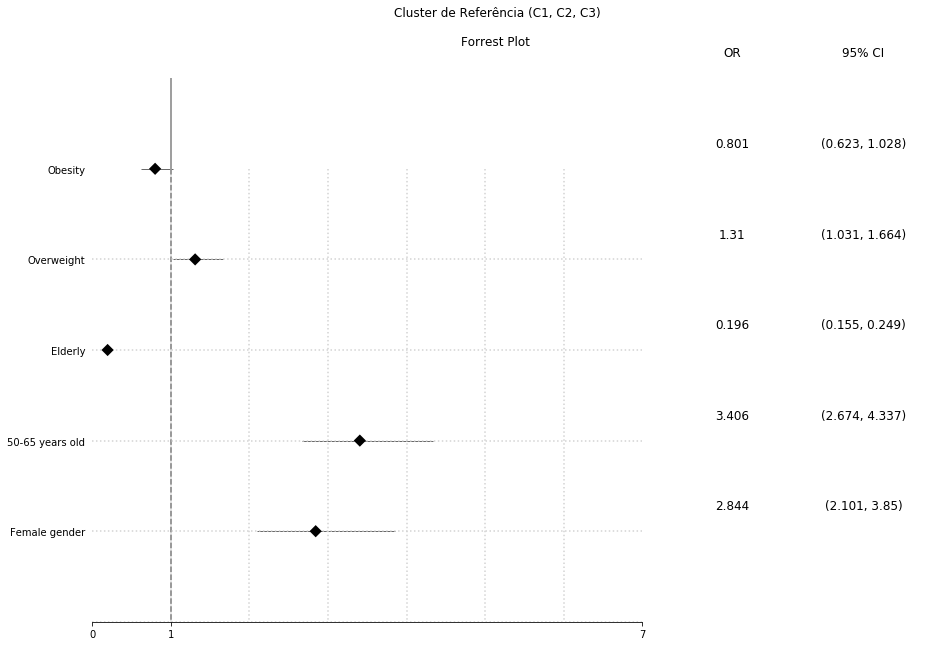

<Figure size 432x288 with 0 Axes>

In [92]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import zepid
from zepid.graphics import EffectMeasurePlot

p = EffectMeasurePlot(label=labs, effect_measure=measure, lcl=lower, ucl=upper)
p.labels(effectmeasure='OR')
p.colors(pointshape="D")
ax=p.plot(figsize=(15,10), t_adjuster=0.13, max_value=7, min_value=0 )
plt.title("Forrest Plot",loc="center",x=-0.65, y=1.05)
plt.suptitle("Cluster de Referência (C1, C2, C3)")#,x=-0.1,y=0.98)
#ax.set_xlabel("Favours Control      Favours Haloperidol       ", fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.vlines([1],0,10,linestyles='solid', colors='white')
ax.vlines([1],0,10,linestyles='dashed', colors='gray')

ax.vlines([2,3,4,5,6],0,20,linestyles='dotted', colors='lightgray')
ax.hlines([1,2,3,4,5],0,10,linestyles='dotted', colors='lightgray')
plt.grid()
plt.show()
plt.savefig("Missing Data Imputation Method",bbox_inches='tight')

In [97]:
for x in ax.get_ymajorticklabels():
    print(x)

Text(0, 0, 'Obesity')
Text(0, 1, 'Overweight')
Text(0, 2, 'Elderly')
Text(0, 3, '50-65 years old')
Text(0, 4, 'Female gender')


In [106]:
for x in ax.get_yticks():
    print(x)

0
1
2
3
4


In [59]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [23]:
p = EffectMeasurePlot(label=labs, effect_measure=measure, lcl=lower, ucl=upper)
plt.show()

In [24]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class MNLogisticReg(linear_model.LogisticRegression):
    
    def __init__(self, *args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)
        if 'fit_intercept' in kwargs.keys():           
            self._fit_intercept = kwargs['fit_intercept']

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        p_values = []
        z_scores = []
        self.columns = list(X.columns)

        #if self._fit_intercept:
        #    X = np.hstack([np.ones((X.shape[0], 1)), X])
           
        for i in range(denom.shape[1]):
            d = denom[:,i]        
            
            #if self._fit_intercept:
            #    self.coef = np.column_stack((self.model.intercept_, self.model.coef_))
            #else:
            #    self.coef = self.model.coef_
            self.coef = self.model.coef_
            d = np.tile(d,(X.shape[1],1)).T
            F_ij = np.dot((X/d).T,X) ## Fisher Information Matrix
            Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix  
            sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
            z_score = (self.coef[i]/sigma_estimates) # z-score for each model coefficient
            z_scores.append(z_score)
            p_vals = [stat.norm.sf(abs(i))*2 for i in z_score] ### two tailed test for p-values
            p_values.append(p_vals)
            
        self.z_scores = np.array(z_scores)
        self.p_values = np.array(p_values)
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

    # A function to create an output in form of pandas dataframe, with regressors and intercept in
    # rows and coefficients in columns. Coefficients, p-values and z-scores are calculated for each
    # pair of classes in the dependent variable
    
    def printstats(self):      
        data = None
        for i in range(self.coef.shape[0]):
            if data is None:
                data = np.vstack(( self.coef[i,:], self.p_values[i,:], self.z_scores[i,:])).T
            else:
                d0 = np.vstack(( self.coef[i,:], self.p_values[i,:], self.z_scores[i,:])).T
                data = np.hstack((data,d0))
        # data is reshaped in the correct order
        regr = []
        for item in list(itertools.combinations(list(dep_acute.unique()), 2)):
            regr.append('{} vs {}'.format(item[0], item[1]))
            
        functions = ['coef', 'P-value', 'Z-score']
        column_names = [([i] + [j]) for i in regr for j in functions] 
        index = pd.MultiIndex.from_tuples(column_names)
        predictors = self.columns
        if self._fit_intercept:
            ind = ['intercept'] + predictors
        else:
            ind = predictors
        self.stats = pd.DataFrame(data, columns = index, index = ind)
        return self.stats

In [25]:
model = MNLogisticReg(solver = 'newton-cg',random_state=0, multi_class ='multinomial')

In [26]:
model.fit(pd.DataFrame(X), y)

In [27]:
model.p_values

array([[0.73573465, 0.58936897, 0.17355628, 0.75243111],
       [0.48826145, 0.72079804, 0.81136607, 0.47927577],
       [0.89384454, 0.59218331, 0.04581581, 0.35145241]])

In [28]:
clf.predict(X[:, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
clf.predict_proba(X[:5, :])

array([[9.81583492e-01, 1.84164930e-02, 1.44986986e-08],
       [9.71336319e-01, 2.86636512e-02, 3.01930552e-08],
       [9.85276828e-01, 1.47231595e-02, 1.23376791e-08],
       [9.76066462e-01, 2.39334983e-02, 3.97043656e-08],
       [9.85234854e-01, 1.47651339e-02, 1.20035768e-08]])

In [31]:
clf.predict_proba(X[:2, :])

array([[9.81583492e-01, 1.84164930e-02, 1.44986986e-08],
       [9.71336319e-01, 2.86636512e-02, 3.01930552e-08]])

In [32]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
#df_alternativo = df_genero.loc[['Masculino','Feminino'],['cluster 1', 'cluster 2']]
#df_alternativo.loc['Feminino','cluster 1'] += df_alternativo.loc['Masculino','cluster 1']
#df_alternativo.loc['Feminino','cluster 2'] += df_alternativo.loc['Masculino','cluster 2']
#df_alternativo.index = ['Masculino','Total']
#df_alternativo

In [34]:
#stats.fisher_exact(df_alternativo)

In [35]:
# A hipótese H0 é da ocorrer Diastólica Isolada no Cluter 1 E Sistólica Isolada no Cluster 2
# A hipótese H1 é de ocorrer Diastólica Isolada no Cluster 2 E Sisólica Isolada no Cluster 1
# Casos positivos: Ser do cluster 1 e ter a doença 1, ser do cluster 2 e ter a doença 2
# Casos negativos: Ser do cluster 1 e ter a doença 2, ser do cluster 2 e ter a doença 1
# Odds ratio é a probabilidade de ocorrência de casos positivos em ralação ao negativos
# Odds ratio = 0.4
#df

#df = df_doencas.iloc[[1,0],[0,1]]
#p_value = np.round(stats.fisher_exact(df)[1])
#p_value
#stats.fisher_exact(df,alternative='less')

In [36]:
df_abordagem = pd.read_csv(lista_caminhos[0], sep=";", encoding='latin1')
df_abordagem.index = df_abordagem['Cluster'].values
df_abordagem = df_abordagem.drop(['Cluster'], axis = 1)
df_imc = df_abordagem.loc[['Peso Normal','Sobrepeso','Obesidade'], :]
#df_imc = df_abordagem.loc[['Abaixo do peso','Peso Normal','Sobrepeso','Obesidade grau 1','Obesidade grau 2','Obesidade Grau 3'], :]
#saida_imc = analisa_imc(df_imc)
df_imc

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
Peso Normal,1161.0,842.0,577.0,1095.0,1182.0,521.0,211.0
Sobrepeso,1120.0,1245.0,1079.0,2041.0,1813.0,772.0,336.0
Obesidade,713.0,770.0,646.0,1305.0,1163.0,457.0,193.0


In [37]:
'''
                cluster 1    cluster 2
abaixo do peso         54           31
peso normal          1107          811


              Variável Y
Variável X    Sim     Não
Sim            a-Positivo     c-Negativo
Não            b-Negativo     d-Positivo

OR = (a / b) / (c / d) = (a * d) / (b * c)

'''
#a = np.sum(df_imc.loc['Abaixo do peso':'Peso Normal','cluster 1'])
#b = np.sum(df_imc.loc['Sobrepeso':,'cluster 1'])
#c = np.sum(df_imc.loc['Abaixo do peso':'Peso Normal','cluster 2'])
#d = np.sum(df_imc.loc['Sobrepeso':,'cluster 2'])
#
#matriz = np.array([[a, c], [b, d]])
#
#import scipy.stats as stats
#stats.fisher_exact([[54,31],[1107,811]],alternative='two-sided')
#

'\n                cluster 1    cluster 2\nabaixo do peso         54           31\npeso normal          1107          811\n\n\n              Variável Y\nVariável X    Sim     Não\nSim            a-Positivo     c-Negativo\nNão            b-Negativo     d-Positivo\n\nOR = (a / b) / (c / d) = (a * d) / (b * c)\n\n'

In [38]:
#print(matriz)
'''
alternative='two-sided' = a probabilidade de H0 ser igual a H1
alternative='less' H1 ser menor que H0
alternative='greater' H1 ser maior que H0
'''
#stats.fisher_exact(matriz,alternative='two-sided')

"\nalternative='two-sided' = a probabilidade de H0 ser igual a H1\nalternative='less' H1 ser menor que H0\nalternative='greater' H1 ser maior que H0\n"

In [39]:
#
#df_categorias = pd.read_csv(caminho_categorias, sep=";", encoding='latin1')
#df_categorias.index = df_categorias['Cluster'].values
#df_categorias = df_categorias.drop(['Cluster'], axis = 1)
#df_categorias

In [40]:
#df_genero = df_categorias.loc[['Masculino','Feminino'], :]
#df_genero
#

In [41]:
#df_idade = df_categorias.loc[['Jovens','Adultos','Meia-idade','Idoso','Ancião','Velhice extrema'], :]
#df_idade